In [59]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [60]:
df=pd.read_csv("Pitchfork2.csv",encoding = "ISO-8859-1")

In [61]:
df=df.drop('Unnamed: 0',axis=1)

In [62]:
month_scraped=12
day_scraped=23
df['Release Year']=df['years'].str.split("/",expand=True)[0]
df['day']=df['dates'].str.split(" ",expand=True)[1]
df.loc[df['day']=="hrs",'day']=day_scraped
df.loc[df['Release Year'].isnull(),'Release Year']=df.loc[df['Release Year'].isnull(),'dates'].str.split(" ",expand=True)[2]
df['month']=month_scraped
def get_month(name,number):
    df.loc[df['dates'].str.split(" ",expand=True)[0]==name,'month']=number
months=["January","February","March","April","May","June","July","August","September","October","November","December"]
for i in range(12):
    get_month(months[i],i+1)

In [63]:
def change_release_year(df,album,artist,year):
    df.loc[(df['artists']==artist) & (df['album']==album),'Release Year']=year
change_release_year(df,'Meat Is Murder','The Smiths',1985)
change_release_year(df,'The Queen Is Dead','The Smiths',1986)
change_release_year(df,'The Smiths','The Smiths',1984)
change_release_year(df,'Strangeways, Here We Come','The Smiths',1987)
change_release_year(df,'Rank','The Smiths',1988)
change_release_year(df,'Hatful of Hollow','The Smiths',1984)
change_release_year(df,"The World Won't Listen",'The Smiths',1987)
change_release_year(df,'Louder Than Bombs','The Smiths',1987)
change_release_year(df,'Disintegration [Deluxe Edition]','The Cure',1989)
change_release_year(df,"Tim","The Replacements",1985)
change_release_year(df,"Pleased to Meet Me","The Replacements",1987)
change_release_year(df,"Don't Tell a Soul","The Replacements",1989)
change_release_year(df,"Sorry Ma, Forgot to Take Out the Trash","The Replacements",1981)
change_release_year(df,"All Shook Down","The Replacements",1990)
change_release_year(df,"Stink","The Replacements",1982)
change_release_year(df,"Hootenanny","The Replacements",1983)
change_release_year(df,"Let It Be","The Replacements",1984)
change_release_year(df,"Spiderland","Slint",1991)
change_release_year(df,"The Disintegration Loops","William Basinski",2002)
change_release_year(df,"On Fire","Galaxie 500",1989)
change_release_year(df,'Laughing Stock',"Talk Talk",1991)
change_release_year(df,'Voodoo','DAngelo',2000)
change_release_year(df,'The Velvet Underground & Nico','The Velvet Underground',1967)
change_release_year(df,"Power, Corruption and Lies",'New Order',1983)
change_release_year(df,"Movement",'New Order',1981)
change_release_year(df,"Low-Life",'New Order',1985)
change_release_year(df,"Brotherhood",'New Order',1986)
change_release_year(df,"Technique (deluxe editions)",'New Order',1989)
change_release_year(df,"Animals",'Pink Floyd',1977)


In [64]:
df['Reissue']=0
df.loc[df['album'].str.lower().str.contains("reissue")==True,'Reissue']=1
df.loc[df['album'].str.lower().str.contains("deluxe")==True,'Reissue']=1
df.loc[df['album']=="Cupid Deluxe",'Reissue']=0
df.loc[df['album']=="Moon Deluxe",'Reissue']=0
df.loc[df['album']=="Love Deluxe",'Reissue']=1
df.loc[df['album'].str.lower().str.contains("anniversary")==True,'Reissue']=1
df.loc[df['album']=="Anniversary",'Reissue']=0
df.loc[df['album']=="Protest a Dark Anniversary",'Reissue']=0
replace=df.loc[(df['years'].str.contains("/")==True) & (df['Release Year'].astype(int)>2011) & (df['Release Year'].astype(int)<2015) 
                & (df['years'].str.split("/",expand=True)[1]!="2016"),'years'].str.split("/",expand=True)[1]
df.loc[(df['years'].str.contains("/")==True) & (df['Release Year'].astype(int)>2011) & (df['Release Year'].astype(int)<2015) 
       & (df['years'].str.split("/",expand=True)[1]!="2016"),'Release Year']=replace

df.loc[(df['album'].str.lower().str.contains('legacy')==True) & (df['album'].str.lower().str.contains('tron')==False),'Reissue']=1

In [94]:
genremeans=df.groupby("genre").mean().reset_index()

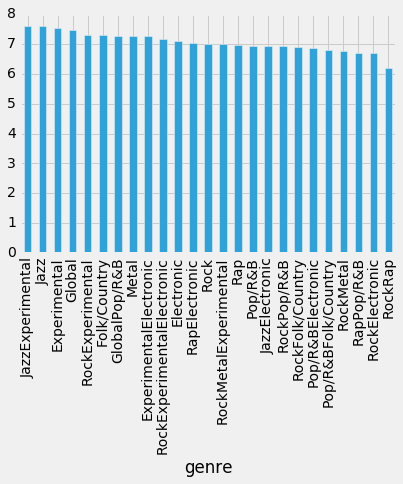

In [116]:
plt.style.use("fivethirtyeight")
genremeans.ix[genremeans['genre'].isin(genres)].sort_values('scores',ascending=False).plot(x="genre",y="scores",kind="bar",legend=False)

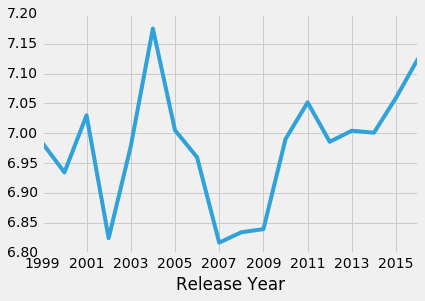

In [117]:
test=df.groupby("Release Year").mean().reset_index()
test.ix[test['Release Year'].astype(float)>1998].plot(x="Release Year",y="scores",legend=False)

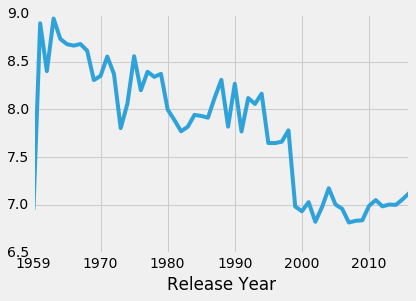

In [118]:
test.plot(x="Release Year",y="scores",legend=False)

<Container object of 18 artists>

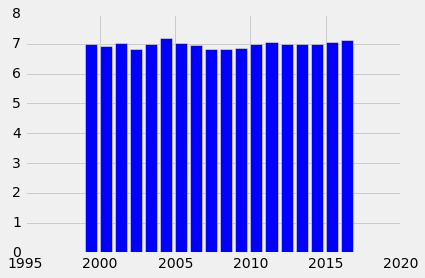

In [119]:
plt.bar(test.ix[test['Release Year'].astype(float)>1998]['Release Year'],test.ix[test['Release Year'].astype(float)>1998]['scores'])

In [125]:
# run to get # of album reviews per year
#df.groupby("Release Year").count().reset_index()
df[(df['labels']=="Rhino") & (df['Release Year'].astype("int")>1996)]

,artists,album,genre,scores,years,labels,dates,Release Year,day,month
2679,Captain Beefheart,Sun Zoom Spark: 1970 to 1972,RockExperimental,8.8,2014,Rhino,November 12 2014,2014,12,11
4548,R.E.M.,Green: 25th Anniversary Deluxe Edition,Rock,8.4,2013/1988,Rhino,May 14 2013,2013,14,5
5149,Joni Mitchell,The Studio Albums 1968-1979,Rock,8.0,2012,Rhino,November 9 2012,2012,9,11
6359,The Smiths,The Smiths Complete,Rock,8.1,2011,Rhino,November 18 2011,2011,18,11
6360,The Smiths,The Smiths,Rock,8.8,2011,Rhino,November 18 2011,2011,18,11
6361,The Smiths,Meat Is Murder,Rock,8.1,2011,Rhino,November 18 2011,2011,18,11
6362,The Smiths,The Queen Is Dead,Rock,10.0,2011,Rhino,November 18 2011,2011,18,11
6363,The Smiths,"Strangeways, Here We Come",Rock,8.3,2011,Rhino,November 18 2011,2011,18,11
6364,The Smiths,Rank,Rock,5.4,2011,Rhino,November 18 2011,2011,18,11
6365,The Smiths,Hatful of Hollow,Rock,10.0,2011,Rhino,November 18 2011,2011,18,11


In [69]:
labels75=df.groupby('labels').count()[df.groupby("labels").count()['artists']>75].reset_index()['labels'].tolist()
labels=df.groupby("labels").mean()

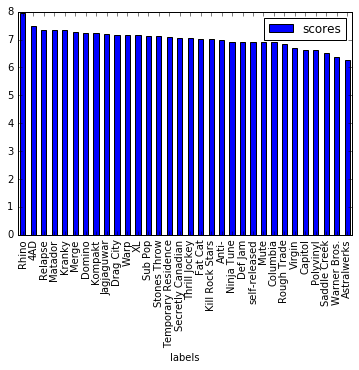

In [70]:
labels.reset_index().ix[labels.reset_index()['labels'].isin(labels75)].sort_values('scores',ascending=False).plot(x="labels",y="scores",kind="bar")

In [36]:
countsmeans=df.groupby("labels").count().reset_index()[['labels','album']].merge(labels.reset_index())

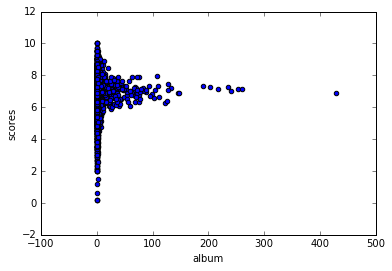

In [41]:
countsmeans.plot.scatter(x="album",y="scores")

In [50]:
artistscores=df.groupby("artists").mean().sort_values("scores",ascending=False).reset_index()
artistcounts=df.groupby("artists").count().reset_index()[['artists','album']]

In [52]:
artists=artistscores.merge(artistcounts)

,artists,scores,album
156,Slowdive,8.625,4


In [57]:
artists.ix[artists['album']==721]

,artists,scores,album
3838,Various Artists,7.290569,721
